<img src='../img/header.jpg' alt='Logo EU Copernicus EUMETSAT' align='right' width='100%'></img>

<hr>

# 04 - Practical exercise Ozone - Solution - Arctic

## About

> In this exercise, you will put a focus on the Arctic and explore the Arctic ozone hole during March and April 2020. 

## Tasks

### 1. Brainstorm &#11088;
* What datasets (satellite, model, ground-based) can you use to better analyse the Arctic Ozone hole that appeared in 2020?
* Reflect on the advantages / limitations of each dataset proposed. Are there specifics to consider due to the geographical location?

### 2. Visualize and animate Metop-A/B/C Level 3 Total column Ozone data for March 2020
* &#128073; Binned Level 3 datasets generated from Metop-A/B/C GOME-2 Level 2 data are available under the folder `../../eodata/gome2/offline/abc/03/`.
 
* &#128161; **Good to know**: Check out this notebook to see how you can generate Level 3 datasets from Metop-A/B/C GOME-2 Level 2 data.


### 3. Download and visualize Pandora Ozone measurements from the Ny Ålesund station in March / April 2020
  * &#128073; Download Pandora O<sub>3</sub> measurements for the Ny Ålesund station
  * &#128073; Filter the data for March to May 2020 and plot it as time-series
 
### 4. Download and visualize CAMS Global Reanalysis (EAC4) data for March and April 2020
  * &#128073; Download the Total column Ozone data from the CAMS Global Reanalysis (EAC4) dataset from the Copernicus Atmosphere Data Store - select data for the time period March and April 2020
  * &#128073; Visualize and animate the Total column Ozone for the Arctic for March and April 2020

### 5. Interpret the results &#127775;
* Summarise your findings from the three different datasets!
* What have you learned about sources of Ozone in the Arctic from Ann Mari's lecture? What can cause a reduction in Ozone levels in the Arctic? 


## Module outline
* [1 - Brainstorm](#brainstorm_ozone)
* [2 - Visualize and animate Metop-A/B/C Level 3 Total column Ozone data for March 2022](#gome2)
* [3 - Download and visualize Pandora Ozone measurements from the Ny Ålesund station in March / April 2020](#ozone_alesund)
* [4 - Download and visualize CAMS Global Reanalysis (EAC4) data for March and April 2020](#cams_eac4)
* [5 - Interpret the results](#results_ozone)


<hr>

#### Load required libraries

In [1]:
import os
import xarray as xr
import numpy as np
import netCDF4 as nc
import pandas as pd
from datetime import datetime
import requests
import shutil
import cdsapi

import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
from matplotlib.axes import Axes
from matplotlib import animation

import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.feature as cfeature
from cartopy.mpl.geoaxes import GeoAxes
GeoAxes._pcolormesh_patched = Axes.pcolormesh

from IPython.display import HTML

#### Load helper functions

In [2]:
%run ../functions.ipynb

<hr>

## <a id='brainstorm_ozone'></a>1. Brainstorm &#11088;


* What datasets (satellite, model, ground-based) can you use to better analyse the Arctic Ozone hole that appeared in 2020?
> **Satellite data:** Metop-A/B/C GOME-2, Sentinel-5P TROPOMI<br>
>
> **Ground-based instruments:** Pandora
>
> **Model-based outputs:** CAMS global reanalysis (EAC4), CAMS global atmospheric forecasts
>
* Reflect on the advantages / limitations of each dataset proposed. Are there specifics to consider due to the geographical location?


<br>

## <a id='gome2'></a>2. Visualize and animate Metop-A/B/C Level 3 Total column Ozone data for March 2020

* &#128073; Binned Level 3 datasets generated from Metop-A/B/C GOME-2 Level 2 data are available under the folder `../../eodata/gome2/offline/abc/03/`.
 
* &#128161; **Good to know**: Check out this notebook to see how you can generate Level 3 datasets from Metop-A/B/C GOME-2 Level 2 data.

Gridded Level 3 data, generated from Metop-A/B/C Level 2 total column Ozone are available unter the folder `../../../eodata/gome2/offlince/abc/03/`. The generate Level 3 datasfiles are `NetCDF` data files Let us now open the generated daily gridded Ozone information for March 2020 and store them as one single `xarray.Dataset`. You can use xarray's function `open_mfdataset()`, which allows the generation of a `xarray.Dataset` on the basis of multiple netCDF files. The function requires the dimension you want to concatenate the files on. In this case, you want to combine the files based on the `time` dimension.

In [ ]:
o3_daily = xr.open_mfdataset('../../eodata/gome2/offline/abc/03/*.nc', concat_dim='time', combine='nested')
o3_daily

Once you loaded the `xarray.Dataset`, you can extract the Ozone variable (`O3`) as `xarray.DataArray`.

In [5]:
o3 = o3_daily.O3
o3

<xarray.DataArray 'O3' (time: 31, latitude_bins: 180, longitude_bins: 360)>
dask.array<concatenate, shape=(31, 180, 360), dtype=float64, chunksize=(1, 180, 360), chunktype=numpy.ndarray>
Coordinates:
  * longitude_bins  (longitude_bins) float64 -179.5 -178.5 ... 178.5 179.5
  * latitude_bins   (latitude_bins) float64 -89.5 -88.5 -87.5 ... 87.5 88.5 89.5
  * time            (time) datetime64[ns] 2020-03-01 2020-03-02 ... 2020-03-31

Now, you can already visualize one time step of the extracted data array with the function `visualize_pcolormesh()`.

(<Figure size 1440x720 with 2 Axes>,
 <GeoAxesSubplot:title={'center':'GOME-2 gridded Level-3 data of tropospheric column density of Ozone for\n 26 March 2020'}>)

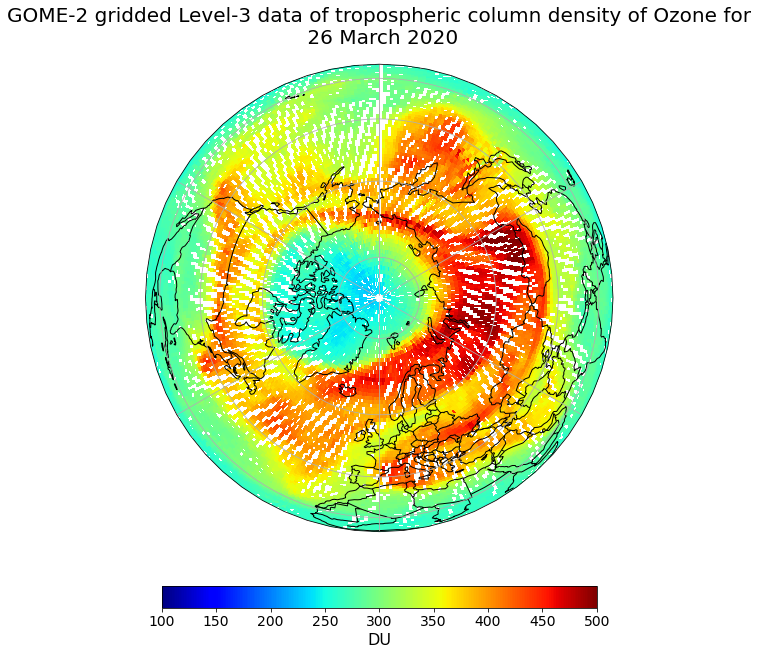

In [6]:
visualize_pcolormesh(data_array=o3[25,:,:], 
                     longitude=o3.longitude_bins, 
                     latitude=o3.latitude_bins, 
                     projection=ccrs.Orthographic(0,90), 
                     color_scale='jet', 
                     unit='DU', 
                     long_name='GOME-2 gridded Level-3 data of tropospheric column density of Ozone for\n 26 March 2020', 
                     vmin=150, 
                     vmax=500)

<br>

In a last step, you can visualize all time steps and animate the Arctic Ozone hole development during March 2020.

In [10]:
date0 = str(o3.time[0].data)[0:10]
title = 'GOME-2 gridded Level 3 data of tropospheric column density of Ozone for\n' + date0

fig, ax = visualize_pcolormesh(data_array=o3[0,:,:], 
                     longitude=o3.longitude_bins, 
                     latitude=o3.latitude_bins, 
                     projection=ccrs.Orthographic(0,90), 
                     color_scale='jet', 
                     unit='DU', 
                     long_name=title, 
                     vmin=150, 
                     vmax=500)

# Define the number of frames (the number of days from 1st September to 30th September).
frames = 30

def draw(i):
    date = str(o3.time[i].data)[0:10]
    img = ax.pcolormesh(o3.longitude_bins, o3.latitude_bins, o3[i,:,:], 
                        cmap=plt.get_cmap('jet'), transform=ccrs.PlateCarree(),
                        vmin=150,
                        vmax=500,
                        shading='auto')
    ax.set_title('GOME-2 gridded Level-3 data of tropospheric column density of Ozone for\n' + date, fontsize=20, pad=20.0)
    return img

def init():
    return fig

def animate(i):
    return draw(i)

ani = animation.FuncAnimation(fig, animate, frames, interval=800, blit=False,
                              init_func=init, repeat=True)

HTML(ani.to_html5_video())
plt.close(fig)


Now, you can play the animation as a video.

In [ ]:
HTML(ani.to_html5_video())

<br>

## <a id='ozone_alesund'></a> 3. Download and visualize Pandora Ozone measurements from the Ny Ålesund station for March to May 2020

In a first step, you want download PGN Ozoen measurements for Ny-Ålesund as a `.txt` file, From the [PDN web interface](https://data.pandonia-global-network.org/) you can choose the station [Ny-Alesund](https://data.pandonia-global-network.org/NyAlesund/). For this exercise, you want to choose the Level 2 column measurements in `txt`, specifically the following file: `Pandora152s1_NyAlesund_L2_rout2p1-8.txt`

With the Python package `requests`, you can download data from a given website. The code block below first establishes a HTTP connection with the PDN website and then copies the data into a `txt` file.

In [4]:
url = 'https://data.pandonia-global-network.org/NyAlesund/Pandora152s1/L2/Pandora152s1_NyAlesund_L2_rout2p1-8.txt'
response = requests.get(url, stream=True)

with open('./Pandora152s1_NyAlesund_L2_rout2p1-8.txt', 'wb') as out_file:
  shutil.copyfileobj(response.raw, out_file)

print('The file was saved successfully')

The file was saved successfully


<br>

The next step is now to read the downloaded `txt`. Let us start with the file of all station measurements for the station Ny Ålesund. You can read the file with the function `read_csv` from the Python library [Pandas](https://pandas.pydata.org/). You have to skip the first 77 rows, as they contain metadata and column information. 

You see below that the resulting dataframe has 54798 rows and 52 columns.

In [12]:
file_path = './Pandora152s1_NyAlesund_L2_rout2p1-8.txt'
df = pd.read_csv(file_path, encoding= 'unicode_escape', skiprows=77, sep=' ', header=None)
df

0            1      2      3       4       5       6   \
0      20200327T093805.1Z  7391.401448  30.18  77.12  154.48   74.04  120.54   
1      20200327T094356.4Z  7391.405514  30.89  77.00  155.97   73.79  121.97   
2      20200327T095020.6Z  7391.409960  29.14  76.88  157.61   73.52  123.55   
3      20200327T095720.6Z  7391.414822  31.16  76.75  159.40   73.23  125.27   
4      20200327T102837.9Z  7391.436550  29.86  76.32  167.42   72.00  133.01   
...                   ...          ...    ...    ...     ...     ...     ...   
54793  20230920T112718.3Z  8663.477295  48.64  77.89  185.49  106.63  130.24   
54794  20230920T113319.5Z  8663.481475  48.92  77.92  187.03  106.44  131.62   
54795  20230920T113821.0Z  8663.484965  46.98  77.95  188.31  106.28  132.77   
54796  20230920T115420.8Z  8663.496075  49.08  78.10  192.40  105.80  136.42   
54797  20230920T142324.1Z  8663.599584  48.00  81.79  230.09  103.15  170.34   

            7         8       9   ...   42        43      44   45    46   47  \
0      0.26440  0.008017  0.2485  ... -9.0  0.035151  224.37 -2.0  5.51 -2.0   
1      0.23710  0.007702  0.2292  ... -9.0  0.031763  224.37 -2.0  5.51 -2.0   
2      0.15480  0.006631  0.2263  ... -9.0  0.020903  224.37 -2.0  5.51 -2.0   
3      0.31630  0.009513  0.2261  ... -9.0  0.043133  224.37 -2.0  5.51 -2.0   
4      0.13710  0.006667  0.2427  ... -9.0  0.019201  224.38 -2.0  5.51 -2.0   
...        ...       ...     ...  ...  ...       ...     ...  ...   ...  ...   
54793  0.09505  0.004793  0.1954  ... -9.0  0.011914  225.60 -2.0  5.51 -2.0   
54794  0.33530  0.008157  0.2308  ... -9.0  0.042371  225.60 -2.0  5.51 -2.0   
54795  0.31130  0.009119  0.2929  ... -9.0  0.039012  225.60 -2.0  5.51 -2.0   
54796  0.37670  0.009415  0.2687  ... -9.0  0.046392  225.60 -2.0  5.51 -2.0   
54797  0.44670  0.057460  0.4443  ... -9.0  0.042263  225.57 -2.0  5.51 -2.0   

         48     49     50   51  
0      5.51  4.203  0.003  0.0  
1      5.51  4.169  0.003  0.0  
2      5.51  4.137  0.003  0.0  
3      5.51  4.102  0.003  0.0  
4      5.51  3.990  0.003  0.0  
...     ...    ...    ...  ...  
54793  5.51  4.436  0.004  0.0  
54794  5.51  4.445  0.004  0.0  
54795  5.51  4.454  0.004  0.0  
54796  5.51  4.501  0.004  0.0  
54797  5.51  6.047  0.013  0.0  

[54798 rows x 52 columns]

In a next step, you want to set the column with the measurement time as index. You can do so with the xarray function `set_index()`. In a next step, you want to convert the format of the index to a `DateTime` object, as this helps you to handle and visualize time-series data better.

In [13]:
df = df.set_index(0)
df.index = pd.to_datetime(df.index, format = '%Y%m%dT%H%M%S.%fZ')
df

1      2      3       4       5       6   \
0                                                                            
2020-03-27 09:38:05.100  7391.401448  30.18  77.12  154.48   74.04  120.54   
2020-03-27 09:43:56.400  7391.405514  30.89  77.00  155.97   73.79  121.97   
2020-03-27 09:50:20.600  7391.409960  29.14  76.88  157.61   73.52  123.55   
2020-03-27 09:57:20.600  7391.414822  31.16  76.75  159.40   73.23  125.27   
2020-03-27 10:28:37.900  7391.436550  29.86  76.32  167.42   72.00  133.01   
...                              ...    ...    ...     ...     ...     ...   
2023-09-20 11:27:18.300  8663.477295  48.64  77.89  185.49  106.63  130.24   
2023-09-20 11:33:19.500  8663.481475  48.92  77.92  187.03  106.44  131.62   
2023-09-20 11:38:21.000  8663.484965  46.98  77.95  188.31  106.28  132.77   
2023-09-20 11:54:20.800  8663.496075  49.08  78.10  192.40  105.80  136.42   
2023-09-20 14:23:24.100  8663.599584  48.00  81.79  230.09  103.15  170.34   

                              7         8       9         10  ...   42  \
0                                                             ...        
2020-03-27 09:38:05.100  0.26440  0.008017  0.2485  0.007802  ... -9.0   
2020-03-27 09:43:56.400  0.23710  0.007702  0.2292  0.007092  ... -9.0   
2020-03-27 09:50:20.600  0.15480  0.006631  0.2263  0.006936  ... -9.0   
2020-03-27 09:57:20.600  0.31630  0.009513  0.2261  0.007087  ... -9.0   
2020-03-27 10:28:37.900  0.13710  0.006667  0.2427  0.006450  ... -9.0   
...                          ...       ...     ...       ...  ...  ...   
2023-09-20 11:27:18.300  0.09505  0.004793  0.1954  0.003774  ... -9.0   
2023-09-20 11:33:19.500  0.33530  0.008157  0.2308  0.005711  ... -9.0   
2023-09-20 11:38:21.000  0.31130  0.009119  0.2929  0.009506  ... -9.0   
2023-09-20 11:54:20.800  0.37670  0.009415  0.2687  0.008563  ... -9.0   
2023-09-20 14:23:24.100  0.44670  0.057460  0.4443  0.062690  ... -9.0   

                               43      44   45    46   47    48     49     50  \
0                                                                               
2020-03-27 09:38:05.100  0.035151  224.37 -2.0  5.51 -2.0  5.51  4.203  0.003   
2020-03-27 09:43:56.400  0.031763  224.37 -2.0  5.51 -2.0  5.51  4.169  0.003   
2020-03-27 09:50:20.600  0.020903  224.37 -2.0  5.51 -2.0  5.51  4.137  0.003   
2020-03-27 09:57:20.600  0.043133  224.37 -2.0  5.51 -2.0  5.51  4.102  0.003   
2020-03-27 10:28:37.900  0.019201  224.38 -2.0  5.51 -2.0  5.51  3.990  0.003   
...                           ...     ...  ...   ...  ...   ...    ...    ...   
2023-09-20 11:27:18.300  0.011914  225.60 -2.0  5.51 -2.0  5.51  4.436  0.004   
2023-09-20 11:33:19.500  0.042371  225.60 -2.0  5.51 -2.0  5.51  4.445  0.004   
2023-09-20 11:38:21.000  0.039012  225.60 -2.0  5.51 -2.0  5.51  4.454  0.004   
2023-09-20 11:54:20.800  0.046392  225.60 -2.0  5.51 -2.0  5.51  4.501  0.004   
2023-09-20 14:23:24.100  0.042263  225.57 -2.0  5.51 -2.0  5.51  6.047  0.013   

                          51  
0                             
2020-03-27 09:38:05.100  0.0  
2020-03-27 09:43:56.400  0.0  
2020-03-27 09:50:20.600  0.0  
2020-03-27 09:57:20.600  0.0  
2020-03-27 10:28:37.900  0.0  
...                      ...  
2023-09-20 11:27:18.300  0.0  
2023-09-20 11:33:19.500  0.0  
2023-09-20 11:38:21.000  0.0  
2023-09-20 11:54:20.800  0.0  
2023-09-20 14:23:24.100  0.0  

[54798 rows x 51 columns]

In a next step, you want to clean the measurements and want to drop unreliable measurements, which are indicated with `-9e99`. You see that one measurements was filtered out.

In [15]:
# Create a boolean mask to identify the rows to be dropped.
mask = df[38] == -9e99

# Drop the rows with the mask.
o3_df = df.drop(df[mask].index)
o3_df

1      2      3       4       5       6   \
0                                                                            
2020-03-27 09:38:05.100  7391.401448  30.18  77.12  154.48   74.04  120.54   
2020-03-27 09:43:56.400  7391.405514  30.89  77.00  155.97   73.79  121.97   
2020-03-27 09:50:20.600  7391.409960  29.14  76.88  157.61   73.52  123.55   
2020-03-27 09:57:20.600  7391.414822  31.16  76.75  159.40   73.23  125.27   
2020-03-27 10:28:37.900  7391.436550  29.86  76.32  167.42   72.00  133.01   
...                              ...    ...    ...     ...     ...     ...   
2023-09-20 11:27:18.300  8663.477295  48.64  77.89  185.49  106.63  130.24   
2023-09-20 11:33:19.500  8663.481475  48.92  77.92  187.03  106.44  131.62   
2023-09-20 11:38:21.000  8663.484965  46.98  77.95  188.31  106.28  132.77   
2023-09-20 11:54:20.800  8663.496075  49.08  78.10  192.40  105.80  136.42   
2023-09-20 14:23:24.100  8663.599584  48.00  81.79  230.09  103.15  170.34   

                              7         8       9         10  ...   42  \
0                                                             ...        
2020-03-27 09:38:05.100  0.26440  0.008017  0.2485  0.007802  ... -9.0   
2020-03-27 09:43:56.400  0.23710  0.007702  0.2292  0.007092  ... -9.0   
2020-03-27 09:50:20.600  0.15480  0.006631  0.2263  0.006936  ... -9.0   
2020-03-27 09:57:20.600  0.31630  0.009513  0.2261  0.007087  ... -9.0   
2020-03-27 10:28:37.900  0.13710  0.006667  0.2427  0.006450  ... -9.0   
...                          ...       ...     ...       ...  ...  ...   
2023-09-20 11:27:18.300  0.09505  0.004793  0.1954  0.003774  ... -9.0   
2023-09-20 11:33:19.500  0.33530  0.008157  0.2308  0.005711  ... -9.0   
2023-09-20 11:38:21.000  0.31130  0.009119  0.2929  0.009506  ... -9.0   
2023-09-20 11:54:20.800  0.37670  0.009415  0.2687  0.008563  ... -9.0   
2023-09-20 14:23:24.100  0.44670  0.057460  0.4443  0.062690  ... -9.0   

                               43      44   45    46   47    48     49     50  \
0                                                                               
2020-03-27 09:38:05.100  0.035151  224.37 -2.0  5.51 -2.0  5.51  4.203  0.003   
2020-03-27 09:43:56.400  0.031763  224.37 -2.0  5.51 -2.0  5.51  4.169  0.003   
2020-03-27 09:50:20.600  0.020903  224.37 -2.0  5.51 -2.0  5.51  4.137  0.003   
2020-03-27 09:57:20.600  0.043133  224.37 -2.0  5.51 -2.0  5.51  4.102  0.003   
2020-03-27 10:28:37.900  0.019201  224.38 -2.0  5.51 -2.0  5.51  3.990  0.003   
...                           ...     ...  ...   ...  ...   ...    ...    ...   
2023-09-20 11:27:18.300  0.011914  225.60 -2.0  5.51 -2.0  5.51  4.436  0.004   
2023-09-20 11:33:19.500  0.042371  225.60 -2.0  5.51 -2.0  5.51  4.445  0.004   
2023-09-20 11:38:21.000  0.039012  225.60 -2.0  5.51 -2.0  5.51  4.454  0.004   
2023-09-20 11:54:20.800  0.046392  225.60 -2.0  5.51 -2.0  5.51  4.501  0.004   
2023-09-20 14:23:24.100  0.042263  225.57 -2.0  5.51 -2.0  5.51  6.047  0.013   

                          51  
0                             
2020-03-27 09:38:05.100  0.0  
2020-03-27 09:43:56.400  0.0  
2020-03-27 09:50:20.600  0.0  
2020-03-27 09:57:20.600  0.0  
2020-03-27 10:28:37.900  0.0  
...                      ...  
2023-09-20 11:27:18.300  0.0  
2023-09-20 11:33:19.500  0.0  
2023-09-20 11:38:21.000  0.0  
2023-09-20 11:54:20.800  0.0  
2023-09-20 14:23:24.100  0.0  

[54777 rows x 51 columns]

Now, you can filter out measurements of low quality and keep only the measurements of medium- and high-quality. This results in a time-series, that drops all measurements in March and only begins on 10 April with medium- and high-quality measurements.

In [21]:
# Define the filter
qc_filter =  o3_df[35].isin([0,1,10,11])

# Apply the filter
o3_df_qc =  o3_df[qc_filter]
o3_df_qc

1      2      3       4       5       6   \
0                                                                            
2020-04-10 05:11:23.100  7405.216239  30.15  82.14   87.90   99.88  237.65   
2020-04-10 05:24:49.900  7405.225577  29.74  81.49   91.19  100.45  240.76   
2020-04-10 05:28:40.200  7405.228242  30.30  81.30   92.14  100.62  241.65   
2020-04-10 05:30:34.100  7405.229562  30.26  81.21   92.60  100.70  242.09   
2020-04-10 05:32:29.000  7405.230891  29.90  81.12   93.07  100.79  242.54   
...                              ...    ...    ...     ...     ...     ...   
2023-09-20 11:00:46.400  8663.458871  48.68  77.83  178.71  107.54  124.16   
2023-09-20 11:16:55.900  8663.470091  48.78  77.85  182.84  106.98  127.86   
2023-09-20 11:21:51.400  8663.473512  48.85  77.86  184.10  106.81  128.99   
2023-09-20 11:27:18.300  8663.477295  48.64  77.89  185.49  106.63  130.24   
2023-09-20 11:33:19.500  8663.481475  48.92  77.92  187.03  106.44  131.62   

                              7         8       9         10  ...   42  \
0                                                             ...        
2020-04-10 05:11:23.100  0.36870  0.008638  0.3960  0.009027  ... -9.0   
2020-04-10 05:24:49.900  0.42010  0.008016  0.3021  0.005820  ... -9.0   
2020-04-10 05:28:40.200  0.45570  0.008311  0.2817  0.005260  ... -9.0   
2020-04-10 05:30:34.100  0.41190  0.008198  0.2334  0.004913  ... -9.0   
2020-04-10 05:32:29.000  0.40950  0.007107  0.2239  0.004704  ... -9.0   
...                          ...       ...     ...       ...  ...  ...   
2023-09-20 11:00:46.400  0.18220  0.005099  0.1093  0.002407  ... -9.0   
2023-09-20 11:16:55.900  0.12910  0.003925  0.1171  0.002549  ... -9.0   
2023-09-20 11:21:51.400  0.17160  0.004837  0.1504  0.002855  ... -9.0   
2023-09-20 11:27:18.300  0.09505  0.004793  0.1954  0.003774  ... -9.0   
2023-09-20 11:33:19.500  0.33530  0.008157  0.2308  0.005711  ... -9.0   

                               43      44   45    46   47    48     49     50  \
0                                                                               
2020-04-10 05:11:23.100  0.033494  227.18 -2.0  5.51 -2.0  5.51  6.224  0.012   
2020-04-10 05:24:49.900  0.040382  227.18 -2.0  5.51 -2.0  5.51  5.872  0.010   
2020-04-10 05:28:40.200  0.044550  227.18 -2.0  5.51 -2.0  5.51  5.776  0.010   
2020-04-10 05:30:34.100  0.040606  227.18 -2.0  5.51 -2.0  5.51  5.732  0.009   
2020-04-10 05:32:29.000  0.040796  227.18 -2.0  5.51 -2.0  5.51  5.687  0.009   
...                           ...     ...  ...   ...  ...   ...    ...    ...   
2023-09-20 11:00:46.400  0.022867  225.60 -2.0  5.51 -2.0  5.51  4.417  0.004   
2023-09-20 11:16:55.900  0.016183  225.60 -2.0  5.51 -2.0  5.51  4.423  0.004   
2023-09-20 11:21:51.400  0.021493  225.60 -2.0  5.51 -2.0  5.51  4.426  0.004   
2023-09-20 11:27:18.300  0.011914  225.60 -2.0  5.51 -2.0  5.51  4.436  0.004   
2023-09-20 11:33:19.500  0.042371  225.60 -2.0  5.51 -2.0  5.51  4.445  0.004   

                          51  
0                             
2020-04-10 05:11:23.100  0.0  
2020-04-10 05:24:49.900  0.0  
2020-04-10 05:28:40.200  0.0  
2020-04-10 05:30:34.100  0.0  
2020-04-10 05:32:29.000  0.0  
...                      ...  
2023-09-20 11:00:46.400  0.0  
2023-09-20 11:16:55.900  0.0  
2023-09-20 11:21:51.400  0.0  
2023-09-20 11:27:18.300  0.0  
2023-09-20 11:33:19.500  0.0  

[17817 rows x 51 columns]

In a next step, you can filter the data frame based on a specific temporal period. You can select the time period April and May 2020.

In [22]:
# Create a boolean mask to identify the rows to be filtered by date
mask = (o3_df_qc.index >= datetime(2020, 4, 10)) & (o3_df_qc.index <= datetime(2020, 5, 31))

# Filter the dataframe with the mask.
o3_df_qc = o3_df_qc.loc[mask]
o3_df_qc

1      2      3       4       5       6   \
0                                                                            
2020-04-10 05:11:23.100  7405.216239  30.15  82.14   87.90   99.88  237.65   
2020-04-10 05:24:49.900  7405.225577  29.74  81.49   91.19  100.45  240.76   
2020-04-10 05:28:40.200  7405.228242  30.30  81.30   92.14  100.62  241.65   
2020-04-10 05:30:34.100  7405.229562  30.26  81.21   92.60  100.70  242.09   
2020-04-10 05:32:29.000  7405.230891  29.90  81.12   93.07  100.79  242.54   
...                              ...    ...    ...     ...     ...     ...   
2020-05-30 19:21:11.300  7455.806381  30.61  74.35  305.93   71.25  200.48   
2020-05-30 19:36:24.700  7455.816953  29.49  74.92  309.54   71.58  204.31   
2020-05-30 21:34:28.000  7455.898935  30.04  78.25  337.45   75.45  233.58   
2020-05-30 22:06:08.800  7455.920935  29.54  78.74  344.93   76.81  241.28   
2020-05-30 23:15:26.000  7455.969051  30.09  79.13    1.28   80.08  257.91   

                              7         8        9         10  ...   42  \
0                                                              ...        
2020-04-10 05:11:23.100  0.36870  0.008638  0.39600  0.009027  ... -9.0   
2020-04-10 05:24:49.900  0.42010  0.008016  0.30210  0.005820  ... -9.0   
2020-04-10 05:28:40.200  0.45570  0.008311  0.28170  0.005260  ... -9.0   
2020-04-10 05:30:34.100  0.41190  0.008198  0.23340  0.004913  ... -9.0   
2020-04-10 05:32:29.000  0.40950  0.007107  0.22390  0.004704  ... -9.0   
...                          ...       ...      ...       ...  ...  ...   
2020-05-30 19:21:11.300  0.09123  0.005215  0.06079  0.002057  ... -9.0   
2020-05-30 19:36:24.700  0.12650  0.005555  0.14370  0.003624  ... -9.0   
2020-05-30 21:34:28.000  0.33660  0.005889  0.30250  0.005410  ... -9.0   
2020-05-30 22:06:08.800  0.43750  0.008334  0.30790  0.006938  ... -9.0   
2020-05-30 23:15:26.000  0.25080  0.006290  0.26030  0.005992  ... -9.0   

                               43      44   45    46   47    48     49     50  \
0                                                                               
2020-04-10 05:11:23.100  0.033494  227.18 -2.0  5.51 -2.0  5.51  6.224  0.012   
2020-04-10 05:24:49.900  0.040382  227.18 -2.0  5.51 -2.0  5.51  5.872  0.010   
2020-04-10 05:28:40.200  0.044550  227.18 -2.0  5.51 -2.0  5.51  5.776  0.010   
2020-04-10 05:30:34.100  0.040606  227.18 -2.0  5.51 -2.0  5.51  5.732  0.009   
2020-04-10 05:32:29.000  0.040796  227.18 -2.0  5.51 -2.0  5.51  5.687  0.009   
...                           ...     ...  ...   ...  ...   ...    ...    ...   
2020-05-30 19:21:11.300  0.014952  234.82 -2.0  5.51 -2.0  5.51  3.552  0.002   
2020-05-30 19:36:24.700  0.020068  234.83 -2.0  5.51 -2.0  5.51  3.671  0.002   
2020-05-30 21:34:28.000  0.043086  234.83 -2.0  5.51 -2.0  5.51  4.557  0.004   
2020-05-30 22:06:08.800  0.053960  234.84 -2.0  5.51 -2.0  5.51  4.722  0.004   
2020-05-30 23:15:26.000  0.031147  234.84 -2.0  5.51 -2.0  5.51  4.862  0.005   

                          51  
0                             
2020-04-10 05:11:23.100  0.0  
2020-04-10 05:24:49.900  0.0  
2020-04-10 05:28:40.200  0.0  
2020-04-10 05:30:34.100  0.0  
2020-04-10 05:32:29.000  0.0  
...                      ...  
2020-05-30 19:21:11.300  0.0  
2020-05-30 19:36:24.700  0.0  
2020-05-30 21:34:28.000  0.0  
2020-05-30 22:06:08.800  0.0  
2020-05-30 23:15:26.000  0.0  

[2761 rows x 51 columns]

Now, you can visulize the time-series of total colum Ozone of the Ny Ålesund station for April and May 2020. Make sure to convert the Ozone measurements from mol per square meters to Dobson Unit [DU], by dividing the values through `4.461 5E-04`.

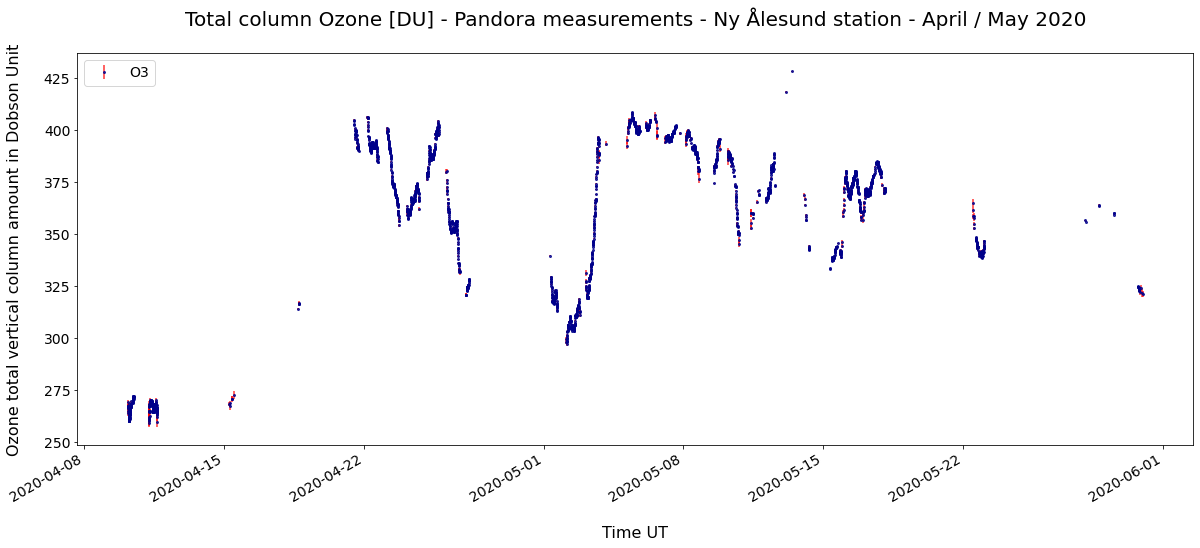

In [23]:
o3 = o3_df_qc.loc[:,38]
o3_err = o3_df_qc.loc[:,39]

fig, ax = plt.subplots(figsize=(20,8))
ax.errorbar(o3.index, o3/4.4615E-04 , yerr=o3_err/4.4615E-04, ecolor='r', label='O3', alpha=0.8, color='darkblue', marker='.', linestyle='none', markersize=4 )

plt.xlabel('\nTime UT', fontsize=16)
plt.ylabel('Ozone total vertical column amount in Dobson Unit\n', fontsize=16)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14, loc=2)
plt.title('Total column Ozone [DU] - Pandora measurements - Ny Ålesund station - April / May 2020\n', fontsize=20)

fig.autofmt_xdate()
plt.show()

## <a id='cams_eac4'></a> 4. Download and visualize CAMS Global Reanalysis (EAC4) data for March / April 2020

First step is to request the [CAMS Global Reanalysis (EAC4)](https://ads.atmosphere.copernicus.eu/cdsapp#!/dataset/cams-global-reanalysis-eac4?tab=overview) from the Copernicus Atmosphere Data Store (ADS). Via the [ADS web interface](https://ads.atmosphere.copernicus.eu/cdsapp#!/dataset/cams-global-atmospheric-composition-forecasts?tab=form), you can select the data and at the end of the web interface, you can open the ADS request via `Show API request`. Copy the request displayed there in the cell below. Once you execute the cell, the download of the data starts automatically.

The variable to be requested is `total_column_ozone` and the time period can be between 1 March and 30 April 2020.

In [ ]:
URL='https://ads.atmosphere.copernicus.eu/api/v2'
KEY='1539:7d734d09-605c-4093-9348-6d7e4a3b51a8'
c = cdsapi.Client(url=URL, key=KEY)

c.retrieve(
    'cams-global-reanalysis-eac4',
    {
        'variable': 'total_column_ozone',
        'date': '2020-03-01/2020-04-30',
        'time': [
            '00:00', '03:00', '06:00',
            '09:00', '12:00', '15:00',
            '18:00', '21:00',
        ],
        'format': 'netcdf',
    },
    './202003_202004_tco3.nc')

<br>

Now you can open the extracted NetCDF file with the xarray function `open_dataset()`. The result is a three-dimensional `xarray.Dataset` with one variable.

In [26]:
file = xr.open_dataset('./202003_202004_tco3.nc')
file

<xarray.Dataset>
Dimensions:    (longitude: 480, latitude: 241, time: 488)
Coordinates:
  * longitude  (longitude) float32 0.0 0.75 1.5 2.25 ... 357.0 357.8 358.5 359.2
  * latitude   (latitude) float32 90.0 89.25 88.5 87.75 ... -88.5 -89.25 -90.0
  * time       (time) datetime64[ns] 2020-03-01 ... 2020-04-30T21:00:00
Data variables:
    gtco3      (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2023-09-23 07:15:23 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

In a next step, you want to extract the variable as `xarray.DataArray` from the `xarray.Dataset` above.

In [27]:
gtco3 = file['gtco3']
gtco3

<xarray.DataArray 'gtco3' (time: 488, latitude: 241, longitude: 480)>
[56451840 values with dtype=float32]
Coordinates:
  * longitude  (longitude) float32 0.0 0.75 1.5 2.25 ... 357.0 357.8 358.5 359.2
  * latitude   (latitude) float32 90.0 89.25 88.5 87.75 ... -88.5 -89.25 -90.0
  * time       (time) datetime64[ns] 2020-03-01 ... 2020-04-30T21:00:00
Attributes:
    units:          kg m**-2
    long_name:      GEMS Total column ozone
    standard_name:  atmosphere_mass_content_of_ozone

Above, you see that the CAMS reanalysis output of Ozone is provided in the unit `[kg m**-2]`. You can convert the values to the unit Dobson Unit, which is more commonly used for Ozone. Get [here](https://confluence.ecmwf.int/pages/viewpage.action?pageId=153391710#:~:text=Dobson%20Unit%20(DU),multiply%20the%20values%20by%2046698.) more information how to convert Ozone data from kg/m2 into DU.

In [30]:
gtco3_du = gtco3*46698
gtco3_du

<xarray.DataArray 'gtco3' (time: 488, latitude: 241, longitude: 480)>
array([[[295.71405, 295.71405, 295.71405, ..., 295.71405, 295.71405,
         295.71405],
        [294.72153, 294.71118, 294.70602, ..., 294.75772, 294.74738,
         294.73187],
        [293.5946 , 293.5791 , 293.5636 , ..., 293.67215, 293.64114,
         293.6153 ],
        ...,
        [301.84488, 301.77252, 301.70532, ..., 302.02582, 301.96378,
         301.90173],
        [305.0809 , 305.04987, 305.01886, ..., 305.1688 , 305.1378 ,
         305.1119 ],
        [306.13547, 306.13547, 306.13547, ..., 306.13547, 306.13547,
         306.13547]],

       [[296.0397 , 296.0397 , 296.0397 , ..., 296.0397 , 296.0397 ,
         296.0397 ],
        [294.57162, 294.54062, 294.50958, ..., 294.6595 , 294.62848,
         294.60263],
        [293.12936, 293.0777 , 293.0208 , ..., 293.3051 , 293.2483 ,
         293.19138],
...
        [254.08011, 254.168  , 254.25587, ..., 253.80098, 253.89401,
         253.98708],
        [255.21222, 255.26906, 255.32593, ..., 255.03645, 255.09332,
         255.15533],
        [256.72684, 256.72684, 256.72684, ..., 256.72684, 256.72684,
         256.72684]],

       [[355.5906 , 355.5906 , 355.5906 , ..., 355.5906 , 355.5906 ,
         355.5906 ],
        [350.74176, 350.7469 , 350.7469 , ..., 350.76758, 350.75726,
         350.75208],
        [346.39432, 346.40466, 346.41498, ..., 346.36847, 346.37366,
         346.38397],
        ...,
        [250.4254 , 250.51328, 250.60114, ..., 250.24448, 250.30649,
         250.36336],
        [251.19562, 251.24733, 251.30417, ..., 251.0664 , 251.10774,
         251.15427],
        [253.13931, 253.13931, 253.13931, ..., 253.13931, 253.13931,
         253.13931]]], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 0.0 0.75 1.5 2.25 ... 357.0 357.8 358.5 359.2
  * latitude   (latitude) float32 90.0 89.25 88.5 87.75 ... -88.5 -89.25 -90.0
  * time       (time) datetime64[ns] 2020-03-01 ... 2020-04-30T21:00:00

Now you can visualise one time step of the organic matter aerosol optical depth at 550 nm. You can use the function `visualize_pcolormesh` to do so.

(<Figure size 1440x720 with 2 Axes>,
 <GeoAxesSubplot:title={'center':'GEMS Total column ozone 2020-03-03T12:00:00'}>)

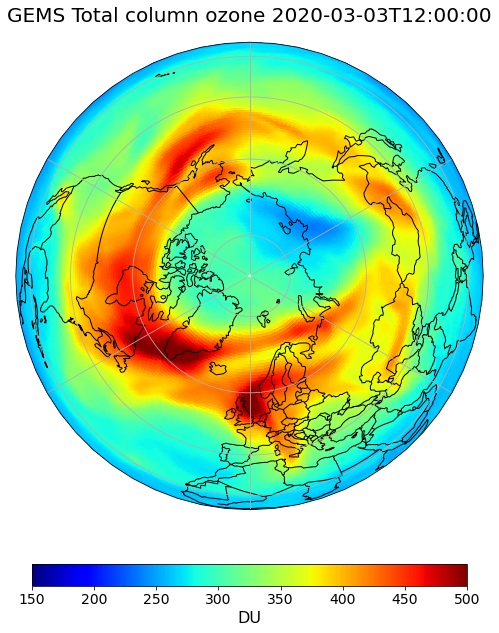

In [31]:
time_index = 20
visualize_pcolormesh(data_array=gtco3_du[time_index,:,:],
                     longitude=gtco3_du.longitude,
                     latitude=gtco3_du.latitude,
                     projection=ccrs.Orthographic(central_latitude=90),
                     color_scale='jet',
                     unit='DU',
                     long_name=gtco3.long_name + ' ' + str(gtco3_du[time_index,:,:].time.data)[0:19],
                     vmin=150, 
                     vmax=500)

As a last step, you can animate the data and create an animation of the organic matter aerosol optical depth forecast over a period of five days, starting on 26 August 2023.

In [ ]:
# Setting the initial state:
# 1. Define figure for initial plot
fig, ax = visualize_pcolormesh(data_array=gtco3_du[0,:,:],
                               longitude=gtco3_du.longitude, 
                               latitude=gtco3_du.latitude,
                               projection=ccrs.Orthographic(0,90), 
                               color_scale='jet', 
                               unit='DU',
                               long_name=gtco3.long_name + ' '+ str(gtco3_du.time[0].data)[0:19],
                               vmin=150,
                               vmax=500)

frames = 487

def draw(i):
    img = plt.pcolormesh(gtco3_du.longitude, 
                         gtco3_du.latitude, 
                         gtco3_du[i,:,:], 
                         cmap='jet', 
                         transform=ccrs.PlateCarree(),
                         vmin=150,
                         vmax=500,
                         shading='auto')
    
    ax.set_title(gtco3.long_name + ' '+ str(gtco3_du.time[i].data)[0:19], fontsize=20, pad=20.0)
    return img

def init():
    return fig

def animate(i):
    return draw(i)

ani = animation.FuncAnimation(fig, animate, frames, interval=800, blit=False,
                              init_func=init, repeat=True)

HTML(ani.to_html5_video())
plt.close(fig)

#### Play the animation video as HTML5 video

In [ ]:
HTML(ani.to_html5_video())

<br>

## <a id='results_ozone'></a> 5. Interpret the results &#127775;

* Summarise your findings from the three different datasets!
> 
* What have you learned about sources of Ozone in the Arctic from Ann Mari's lecture? What can cause a reduction in Ozone levels in the Arctic? 
> In the Arctic, the main sources of O3 are stratospheric intrusions, long-range transport from lower latitudes, and local photochemical production. 
Heterogeneous processes involve the uptake of O3 by aerosols or snow, which can reduce the O3 levels and affect the ozone depletion events in the polar regions. 
>
> **Transport**: O3 can be transported from lower latitudes to higher latitudes by large-scale atmospheric circulation patterns, such as the polar jet stream, the polar vortex, and the Brewer-Dobson circulation. These patterns can influence the interannual variability and trends of O3 in the Arctic. For example, a stronger polar vortex can isolate the Arctic air mass from the mid-latitude air mass, resulting in lower O3 levels in the Arctic due to enhanced chemical destruction. Conversely, a weaker polar vortex can enhance the mixing of air masses and increase the O3 levels in the Arctic due to increased stratospheric influx.


<br>

<hr>

This project is licensed under <a href="../LICENSE">MIT License</a> and is developed under a Copernicus contract.

<p style="text-align:left;"> <a href='https://training.eumetsat.int'>EUMETSAT Training</a> | <a href='mailto:training@eumetsat.int'>Contact the training team</a></p>

<img src='../img/footer.jpg' alt='Joint Training School Footer' align='left' width='100%'>